# 1D Dynamical systems
Here we explore a bi-stable dynamical system finindg the fixed points and classifying them. A simple autonamus 1D dynamical system is defined by and evolution function $\dot x = f(x)$, where $f(x): \mathbb{R} \to \mathbb{R}$ and an inial condtion $x(t=0) = x_0$.
Here we analyze the system numerically. 

In [2]:
#dependancies
import numpy as np 
import matplotlib.pyplot as plt
import sympy as sp

# enables LaTeX output in Jupyter
from IPython.display import display
from sympy import init_printing
init_printing() 

## Analysis of a potential
We will focus on a potential forcing, such that $f = -\frac{dV}{dx}$

In [3]:
# Symbols
x, a, eps = sp.symbols('x a epsilon', real=True)

# Potential 
V = (a**2)*(x**2 - 1)**2 + eps*x; #Definition 
dVdx = sp.diff(V, x)       #Symbolic derivative

# Print the potential and derivative
print("Potential V(x):")
display(sp.Eq(sp.Symbol('V(x)'), V))

print("Derivative dV/dx:")
display(sp.Eq(sp.Symbol('f(x) = - dV/dx'), -dVdx))

Potential V(x):


Derivative dV/dx:


## Fixed points and stability

Fixed points:
1) -1.02  - Stable
2)  0.05  - Unstable
3)  0.97  - Stable


Text(0, 0.5, '$V(x)$')

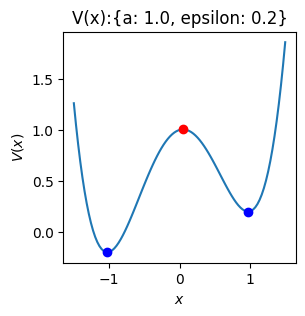

In [4]:
#definve values
params = {a: 1.0, eps: 0.2}
tol = 1e-10;

#substitute in expresion
f_parm    = -dVdx.subs(params) 
dfdx_num = sp.lambdify(x, sp.diff(f_parm, x), "numpy") #numberical version for evaluation 

#find fixed points as the real roots of f
roots_num = sp.nroots(f_parm)  #complex roots numerically
fixed_points = [r.evalf() for r in roots_num if abs(sp.im(r)) < tol]
fp_stability = np.zeros_like(fixed_points);

print('Fixed points:')
for i,r in enumerate(fixed_points):
    if dfdx_num(r) < - tol: 
        fp_type = 'Stable'
        fp_stability[i] = 1
    elif dfdx_num(r) > tol: 
        fp_type = 'Unstable'
        fp_stability[i] = -1
    else:
        fp_type = 'Degenerate'
        fp_stability[i] = 0
    
    print(f'{i+1}) {r:5.2f}  - {fp_type}')


# Plot potential and force, marking fixed points
V_num = sp.lambdify(x, V.subs(params), "numpy") 
X = np.linspace(-1.5, 1.5, 100)
    
plt.figure(figsize=(3,3), dpi = 100)
plt.plot(X,V_num(X))

for i,fp in enumerate(fixed_points):
    col = 'blue' if fp_stability[i] == 1 else 'red' if fp_stability[i] == -1 else 'black'
    plt.scatter(fp, V_num(fp), zorder = 3, color = col, marker = 'o')
plt.title(f'V(x):{params}')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
